In [36]:
from collections import OrderedDict

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

from src.data import *
from src.config import *
from src.scores import print_scores

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [38]:
y, x = load_data("data/PSI_Biology_solubility_trainset.csv", device, 786)

In [39]:
X = encode_one_hot(x).flatten(start_dim=1)

In [40]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=500)
pca.fit(X)

PCA(n_components=500)

In [117]:
X_red = pca.transform(X)

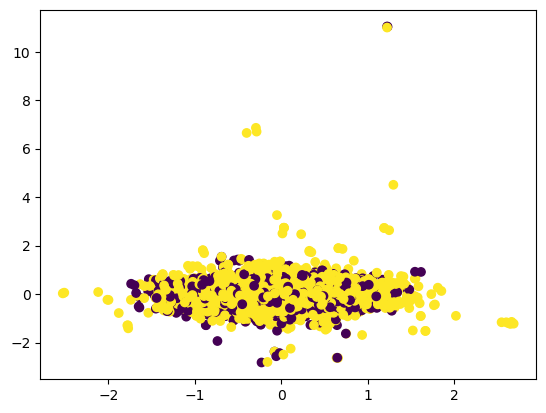

In [136]:
plt.scatter(X_red[:, 6], X_red[:, 20], c=y)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
# x_enc = encode_one_hot(x)

x_tr, x_te, y_tr, y_te = train_test_split(X_red, y, test_size=0.2)

In [123]:
clf = LogisticRegression(max_iter=20000)

In [124]:
clf.fit(x_tr, y_tr)

LogisticRegression(max_iter=20000)

In [125]:
y_pred = clf.predict_proba(x_te)[:, 1] * 2 - 1

In [127]:
print_scores(torch.tensor(y_pred), y_te)

Accuracy: 0.674
Precision: 0.854
Recall: 0.701
Pred. STD: 0.088
F1: 0.779
ROC AUC: 0.666
